# 6.4 Supervised Machine Learning

## GDELT Conflict Dataset 1.0 (2021)

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries
2. Import data
3. Exploratory data analysis
4. Prep data for regression analysis
5. Regression analysis

# 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import data

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdelt_trimmed.csv'))
df

,Unnamed: 0,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...,...
171789,171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


In [3]:
# Drop first column
df=df.drop(df.columns[0], axis=1)
df

,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
0,1979,China,350,FIGHT,Fight with small arms and light weapons,-10.0,3.988571,1396,1.906000,Extremely destabilizing
1,1979,Croatia,14,FIGHT,"Use conventional military force, not specified...",-10.0,2.642857,37,4.335594,Extremely destabilizing
2,1979,Sudan,16,COERCE,"Arrest, detain, or charge with legal action",-5.0,6.000000,96,3.358047,Moderately destabilizing
3,1979,Syria,71,FIGHT,Fight with small arms and light weapons,-10.0,3.647887,259,3.557653,Extremely destabilizing
4,1979,Germany,33,COERCE,"Impose administrative sanctions, not specified...",-5.0,4.484848,148,4.841399,Moderately destabilizing
...,...,...,...,...,...,...,...,...,...,...
171789,2020,Paraguay,1,USE UNCONVENTIONAL MASS VIOLENCE,Engage in ethnic cleansing,-10.0,2.000000,2,-0.833333,Extremely destabilizing
171790,2020,Andorra,1,ASSAULT,Assassinate,-10.0,8.000000,8,-2.494443,Extremely destabilizing
171791,2020,Gibraltar,4,FIGHT,Employ aerial weapons,-10.0,3.750000,15,-1.181874,Extremely destabilizing
171792,2020,Gaza Strip,2,ASSAULT,Kill by physical assault,-10.0,5.000000,10,-7.157464,Extremely destabilizing


##### Data was already cleaned in a previous exercise, so I will forgo doing so again

# 3. Exploratory data analysis

In [4]:
# Make graphs display automatically
%matplotlib inline

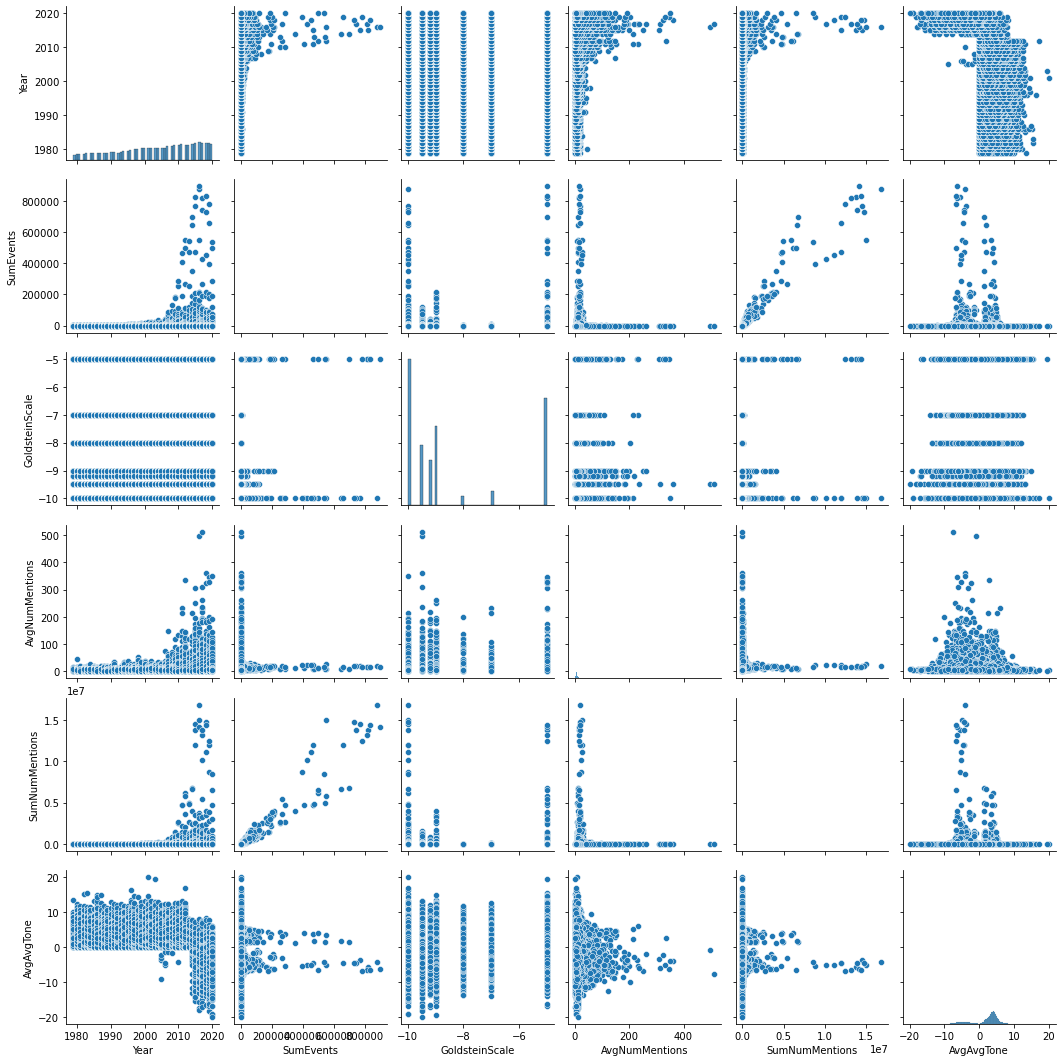

In [5]:
# Create pair plot 
g = sns.pairplot(df)

##### None of these look particularly promising. Most of these variables are either subjective (like the tone), oddly defined (like the Goldstein scale), or are aggregates. There aren't really any good hard-and-fast traits here to analyze. That said, for the purposes of this exercise I'll examine the relationship between the average tone and the average number of mentions. Since there is a big shift in average tones around the year 2012 or so, I'll exclude all incidents prior to that year.

(2010.0, 2022.05)

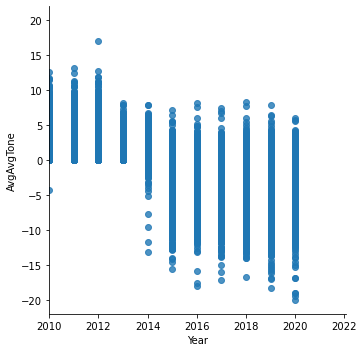

In [6]:
# Create scatterplot of average tone vs year to figure out which year should be the cutoff point
sns.lmplot( x='Year', y='AvgAvgTone', data=df, fit_reg=False)
plt.xlim(2010, None)

##### It looks like the change in tones occurs around 2014, so this will be the cutoff for year values

In [7]:
# Make subset consisting only of data from 2014 onwards
toneshift=df[df['Year']>= 2014]
toneshift.head()

,Year,CountryName,SumEvents,EventRootDescr,EventDescr,GoldsteinScale,AvgNumMentions,SumNumMentions,AvgAvgTone,Destabilization category
128801,2014,Ireland,12390,COERCE,"Arrest, detain, or charge with legal action",-5.0,7.661824,94930,1.591818,Moderately destabilizing
128802,2014,Iran,24197,FIGHT,"Use conventional military force, not specified...",-10.0,9.291730,224832,1.910678,Extremely destabilizing
128803,2014,Marshall Islands,150,COERCE,"Arrest, detain, or charge with legal action",-5.0,5.026667,754,1.676565,Moderately destabilizing
128804,2014,Greece,5579,COERCE,"Arrest, detain, or charge with legal action",-5.0,8.151461,45477,1.554797,Moderately destabilizing
128805,2014,Peru,2471,FIGHT,"Use conventional military force, not specified...",-10.0,9.677863,23914,2.148247,Extremely destabilizing


### Hypothesis: There will be no significant relationship between average tone and average number of mentions

# 4. Prep data for regression analysis

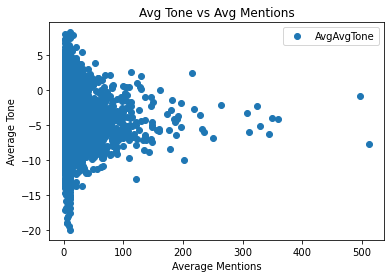

In [8]:
# Create scatterplot
toneshift.plot(x='AvgNumMentions', y='AvgAvgTone',style='o')
plt.title('Avg Tone vs Avg Mentions')  
plt.xlabel('Average Mentions')  
plt.ylabel('Average Tone')  
plt.show()

In [9]:
# Put variables into NumPy arrays
X=toneshift['AvgNumMentions'].values.reshape(-1,1)
y=toneshift['AvgAvgTone'].values.reshape(-1,1)
X

array([[7.66182405],
       [9.29173038],
       [5.02666667],
       ...,
       [3.75      ],
       [5.        ],
       [4.        ]])

In [10]:
y

array([[ 1.59181757],
       [ 1.91067827],
       [ 1.67656509],
       ...,
       [-1.18187448],
       [-7.15746421],
       [-4.83271375]])

In [11]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [12]:
# Create a regression object
regression = LinearRegression()

In [13]:
# Fit regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

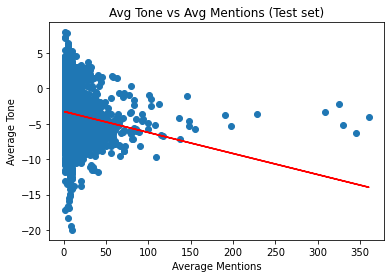

In [14]:
# Plot regression line on test set
y_predicted = regression.predict(X_test)
plot_test = plt
plot_test.scatter(X_test, y_test)
plot_test.plot(X_test, y_predicted, color='red')
plot_test.title('Avg Tone vs Avg Mentions (Test set)')
plot_test.xlabel('Average Mentions')
plot_test.ylabel('Average Tone')
plot_test.show()

##### This does not appear to fit the data very well at all, but I didn't expect it to. I hypothesized that there would be no meaningful relationship between the two variables.

In [15]:
# Create & print model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02973799]]
Mean squared error:  8.95081590915564
R2 score:  0.013389009628243298


##### As expected, the summary statistics confirm that the line is not a good fit

In [16]:
# Compare actual and predicted values of y
ycomparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
ycomparison.head(30)

,Actual,Predicted
0,-7.153145,-3.320076
1,1.511761,-3.507832
2,-5.106984,-3.474173
3,-2.542373,-3.334945
4,1.535254,-3.578799
5,-4.920773,-3.746935
6,-3.557500,-3.764869
7,2.153275,-3.483635
8,-3.296399,-3.403342
9,-5.360764,-3.402563


##### Not even close

##### As expected, the model was unable to accurately predict values because there simply isn't any meaningful relationship between the variables for it to model. The nature of this particular dataset doesn't lend itself to this sort of analysis. I had a slight hope that by excluding the data before the tone shift in 2014, I might get something, but that didn't work out. Such is life!